# 09 - SUMMARY
---

RESULTS:

## __comparison of the best performing models created with each aproach__  
* Table 1 shows sorted, best performing models crated with every sinlge approach, evaluated in the current project. Models created with one layer and two layer dense networks produced results wiht the highest test accuracy, 0.98 form all methods. These were folowed by the best performing models created with random forest, knn, and SVM with linear kernel, that all produced results with 0.96 test accuracy. All these models, were trained using extracted features with imagenet, projected on subset of pincipial axes. If no PCA data preprocessing step was used, the model accuracy was lower. The accuracy of de novo created final models in notebook 08, final Model 1 and 2 (0.68 and 0.74, respectively), was similar to accuracy obtained with decision tree appraoch (0.79) and was lower then all other best perfoming models created with extracted features with imagenet.  

  
## __comparison of accuracy of models obtained by different group of techniques__  
* Here, the goal was to compare which technique, may give the best results irrespectively on the parameters used, and which methods were highly sensitive for different parameters, and may produce results wiht relatively low accuracy. For this purpose I created two boxplots presenting accuracy, of all 2500 models tested with all different techniques and aproaches in the current project. Boxes o  each plot, were sorted using median model accuracy.  Separate plots were created for test and validation accuracy results. 
* As predicticted dense networks, knn, SVM-linear kernel and logistic regression were the most reliable methods, with nearly all constructed models producindg results with over 80% test accuracy and validation accuracy. In contrast decision trees, and SMV-rbf kernel methods were the least reliable, methods, with large differences in accuracy results produced by the models created with these aproaches with different parameters. 
* Interstingly, adding PCA step to feature preprocessing, was inceasing the variability in accuracy results, possibly, because I was comparing models created wiht features projected on different number of principial axes. 





In [4]:
import os # allow changing, and navigating files and folders, 
import sys
import re # module to use regular expressions, 
import glob # lists names in folders that match Unix shell patterns
import random # functions that use and generate random numbers

import pickle
import warnings
import numpy as np # support for multi-dimensional arrays and matrices
import pandas as pd # library for data manipulation and analysis
import seaborn as sns # advance plots, for statistics, 
import matplotlib as mpl # to get some basif functions, heping with plot mnaking 
import matplotlib.pyplot as plt # for making plots, 

import tensorflow as tf
from PIL import Image, ImageDraw
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
import graphviz # allows visualizing decision trees,

# TABLE 1. Accuracy of best performing Models create with each method

In [10]:
display(st)

,method,tested_models_nr,acc_train,acc_valid,acc_test
0,dense networks - two layers,360,1.000000,0.902041,0.98
1,dense networks - one layer,15,1.000000,0.912245,0.98
2,random_forest + PCA,360,1.000000,0.928571,0.96
3,knn + PCA,696,0.921502,0.880952,0.96
4,SVM-linear + PCA,72,1.000000,0.920635,0.96
5,knn,232,0.904437,0.904762,0.94
6,SVM-linear,24,1.000000,0.936508,0.94
7,random_forest,120,1.000000,0.936508,0.94
8,SVM-rbf + PCA,72,0.982935,0.936508,0.94
9,SVM-rbf,24,0.982935,0.936508,0.94


# PLOT accuracy caulated for models created with each method 

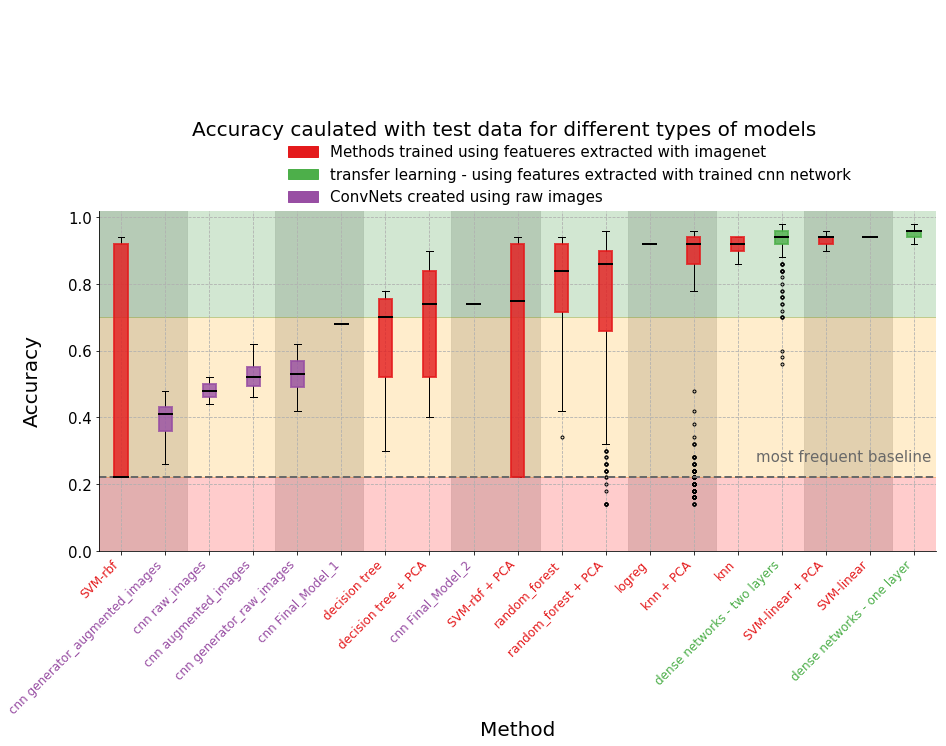

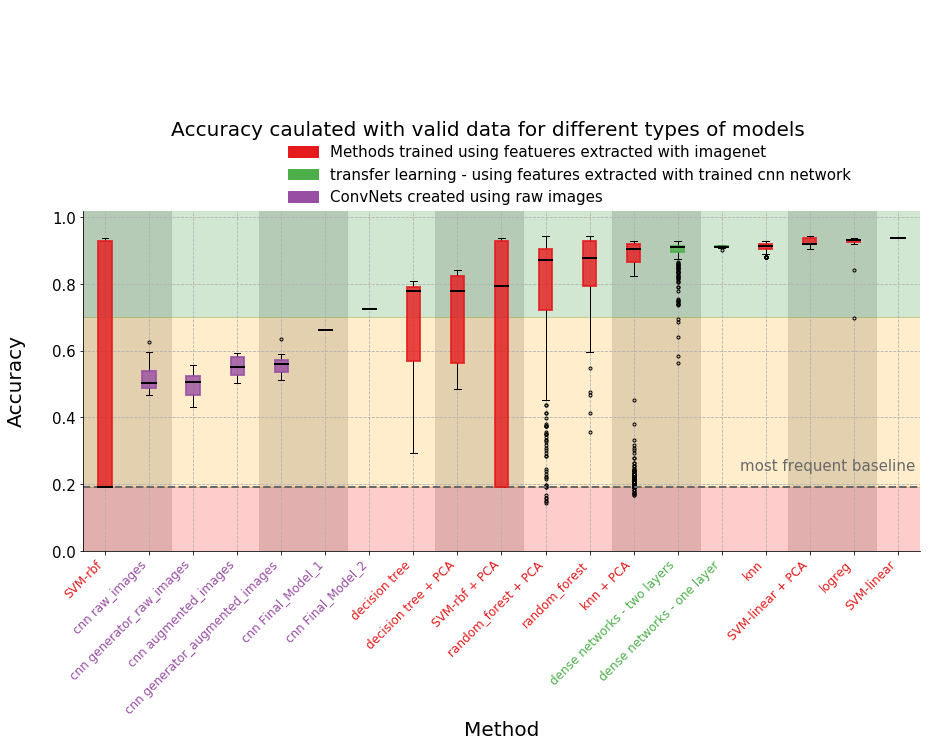

In [11]:
# plot model summary, 
for dtype in ["test", "valid"]:
    fig = boxplot_with_acc_from_different_models(
        title = f"Accuracy caulated with {dtype} data for different types of models",
        summary_df=summary_df_for_boxplot, dtype=dtype, 
        figsize=(15,7), legend__bbox_to_anchor=(0.8, 1.22), 
        cmap="Set1", cmap_colors_from=.1, cmap_colors_to=0.4) # cmap="RdYlGn")
    fig.show();